In [161]:
# Regression Neural Network

In [162]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [163]:
# Importing the dataset
df = pd.read_csv('nt_var4_prep.csv', sep=';')

In [164]:
df

,ActualPower,Max Capacity,Location 2,Location 4,Location 6,Location 8
0,8.491,43.5,0.718,0.970,0.874000,0.902
1,11.232,43.5,0.776,1.072,0.975000,0.985
2,8.989,43.5,0.862,1.240,1.122000,1.103
3,5.969,43.5,0.984,1.448,1.296000,1.230
4,4.637,43.5,1.116,1.627,1.440000,1.308
...,...,...,...,...,...,...
312,27.630,43.5,5.644,5.716,5.061000,4.836
313,26.432,43.5,6.042,6.137,5.157000,4.750
314,27.282,43.5,6.573,6.747,7.196924,4.716
315,28.285,43.5,7.268,7.558,5.693000,4.856


In [165]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df['ActualPower'] = sc.fit_transform(df[['ActualPower']])
df['Max Capacity'] = sc.fit_transform(df[['Max Capacity']])
df['Location 2'] = sc.fit_transform(df[['Location 2']])
df['Location 4'] = sc.fit_transform(df[['Location 4']])
df['Location 6'] = sc.fit_transform(df[['Location 6']])
df['Location 8'] = sc.fit_transform(df[['Location 8']])

In [166]:
df

,ActualPower,Max Capacity,Location 2,Location 4,Location 6,Location 8
0,-0.739800,0.498148,-2.424718,-2.366223,-2.346836,-2.098813
1,-0.493536,0.498148,-2.403814,-2.328951,-2.309349,-2.067244
2,-0.695057,0.498148,-2.372818,-2.267561,-2.254788,-2.022363
3,-0.966387,0.498148,-2.328848,-2.191555,-2.190205,-1.974059
4,-1.086060,0.498148,-2.281274,-2.126146,-2.136758,-1.944392
...,...,...,...,...,...,...
312,0.979731,0.498148,-0.649330,-0.631967,-0.792776,-0.602528
313,0.872097,0.498148,-0.505887,-0.478128,-0.757144,-0.635238
314,0.948465,0.498148,-0.314508,-0.255225,0.000000,-0.648170
315,1.038579,0.498148,-0.064022,0.041126,-0.558201,-0.594921


In [167]:
# Splitting the dataset into the Training set and Test set
X = df.iloc[:, 1:6].values
y = df.iloc[:, 1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [168]:
# Cheking correlations
df.corr()

,ActualPower,Max Capacity,Location 2,Location 4,Location 6,Location 8
ActualPower,1.000000,0.420251,0.302923,0.323568,0.248935,0.201316
Max Capacity,0.420251,1.000000,0.083967,0.095590,0.062411,0.047621
Location 2,0.302923,0.083967,1.000000,0.985472,0.965056,0.907740
Location 4,0.323568,0.095590,0.985472,1.000000,0.967973,0.897816
Location 6,0.248935,0.062411,0.965056,0.967973,1.000000,0.960079
Location 8,0.201316,0.047621,0.907740,0.897816,0.960079,1.000000


In [169]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input

In [170]:
# Построение нейронной сети со следующей архитектурой (5-5-1): входной слой с 5 нейронами (кол-во объясняющих перемннных), скрытый слой
# с 5 нейронами и один выходной слой
# Initialising the ANN
rnn1=Sequential()

# Adding the input layer
rnn1.add(Input(shape=(5,)))

# Adding the hidden layer
rnn1.add(Dense(5, activation='tanh'))

# Adding the output layer
rnn1.add(Dense(1, activation='linear'))

# Compiling the ANN
rnn1.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [171]:
# Fitting the ANN to the Training set
rnn1.fit(X_train, y_train, batch_size = 20, epochs = 100)

Epoch 1/100
13/13 [==============================] - 0s 997us/step - loss: 1.4328 - accuracy: 0.0000e+00
Epoch 2/100
13/13 [==============================] - 0s 921us/step - loss: 1.2852 - accuracy: 0.0000e+00
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 1.1569 - accuracy: 0.0000e+00
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 1.0477 - accuracy: 0.0000e+00
Epoch 5/100
13/13 [==============================] - 0s 1ms/step - loss: 0.9526 - accuracy: 0.0000e+00
Epoch 6/100
13/13 [==============================] - 0s 1ms/step - loss: 0.8737 - accuracy: 0.0000e+00
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 0.8039 - accuracy: 0.0000e+00
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 0.7407 - accuracy: 0.0000e+00
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6864 - accuracy: 0.0000e+00
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - l

13/13 [==============================] - 0s 1ms/step - loss: 0.0466 - accuracy: 0.0000e+00
Epoch 80/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0459 - accuracy: 0.0000e+00
Epoch 81/100
13/13 [==============================] - 0s 997us/step - loss: 0.0455 - accuracy: 0.0000e+00
Epoch 82/100
13/13 [==============================] - 0s 997us/step - loss: 0.0449 - accuracy: 0.0000e+00
Epoch 83/100
13/13 [==============================] - 0s 921us/step - loss: 0.0445 - accuracy: 0.0000e+00
Epoch 84/100
13/13 [==============================] - 0s 997us/step - loss: 0.0439 - accuracy: 0.0000e+00
Epoch 85/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0433 - accuracy: 0.0000e+00
Epoch 86/100
13/13 [==============================] - 0s 997us/step - loss: 0.0427 - accuracy: 0.0000e+00
Epoch 87/100
13/13 [==============================] - 0s 997us/step - loss: 0.0422 - accuracy: 0.0000e+00
Epoch 88/100
13/13 [==============================] - 0s 1ms/step

In [172]:
# Predicting the Test set results
y_pred1 = rnn1.predict(X_test)

In [173]:
#Inversing scalling
#from sklearn.preprocessing import StandardScaler
#y_hat1 = sc.inverse_transform(y_pred1)
#y_test = sc.inverse_transform(y_test)
#X_test = sc.inverse_transform(X_test)

In [174]:
#from sklearn.metrics import mean_squared_error 
#mean_squared_error(y_test,y_hat1)

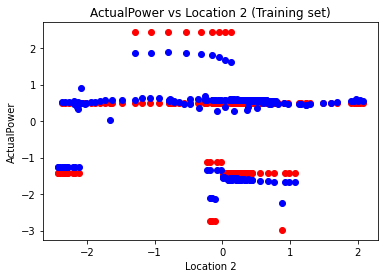

In [175]:
# Visualising the Training set results
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], rnn1.predict(X_train), 'bo')
plt.title('ActualPower vs Location 2 (Training set)')
plt.xlabel('Location 2')
plt.ylabel('ActualPower')
plt.show()

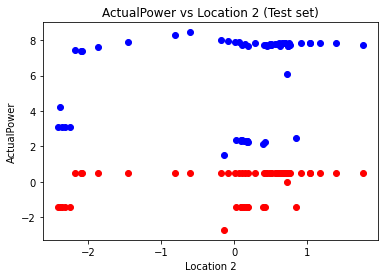

In [176]:
# Visualising the Test set results
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], y_hat1, 'bo')
plt.title('ActualPower vs Location 2 (Test set)')
plt.xlabel('Location 2')
plt.ylabel('ActualPower')
plt.show()

In [177]:
# Построение нейронной сети со следующей архитектурой (5-5-5-1): входной слой с 5 нейронами (кол-во объясняющих перемннных), 2 скрытых слоя
# с 5 нейронами и один выходной слой
# Initialising the ANN
rnn2=Sequential()

# Adding the input layer
rnn2.add(Input(shape=(5,)))

# Adding the  first hidden layer
rnn2.add(Dense(5, activation='tanh'))

# Adding the  second hidden layer
rnn2.add(Dense(5, activation='tanh'))

# Adding the output layer
rnn2.add(Dense(1, activation='linear'))

# Compiling the ANN
rnn2.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [178]:
# Fitting the ANN to the Training set
rnn2.fit(X_train, y_train, batch_size = 20, epochs = 100)

Epoch 1/100
13/13 [==============================] - 0s 1ms/step - loss: 0.8840 - accuracy: 0.0000e+00
Epoch 2/100
13/13 [==============================] - 0s 1ms/step - loss: 0.7403 - accuracy: 0.0000e+00
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 0.6121 - accuracy: 0.0000e+00
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 0.5201 - accuracy: 0.0000e+00
Epoch 5/100
13/13 [==============================] - 0s 1ms/step - loss: 0.4306 - accuracy: 0.0000e+00
Epoch 6/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3580 - accuracy: 0.0000e+00
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 0.3012 - accuracy: 0.0000e+00
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2544 - accuracy: 0.0000e+00
Epoch 9/100
13/13 [==============================] - 0s 1ms/step - loss: 0.2149 - accuracy: 0.0000e+00
Epoch 10/100
13/13 [==============================] - 0s 1ms/step - loss:

13/13 [==============================] - 0s 1ms/step - loss: 0.0210 - accuracy: 0.0000e+00
Epoch 80/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0207 - accuracy: 0.0000e+00
Epoch 81/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0201 - accuracy: 0.0000e+00
Epoch 82/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0198 - accuracy: 0.0000e+00
Epoch 83/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0194 - accuracy: 0.0000e+00
Epoch 84/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0190 - accuracy: 0.0000e+00
Epoch 85/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0187 - accuracy: 0.0000e+00
Epoch 86/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0183 - accuracy: 0.0000e+00
Epoch 87/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0179 - accuracy: 0.0000e+00
Epoch 88/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0

In [179]:
# Predicting the Test set results
y_pred2 = rnn2.predict(X_test)

In [180]:
#Inversing scalling
#from sklearn.preprocessing import StandardScaler
#y_hat2 = sc.inverse_transform(y_pred2)
#y_test = sc.inverse_transform(y_test)
#X_test = sc.inverse_transform(X_test)

In [181]:
#from sklearn.metrics import mean_squared_error 
#mean_squared_error(y_test,y_hat2)

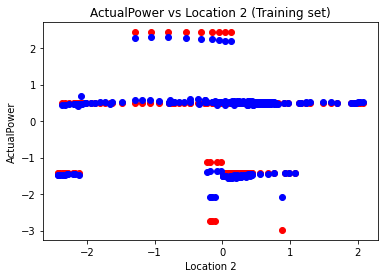

In [182]:
# Visualising the Training set results
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], rnn2.predict(X_train), 'bo')
plt.title('ActualPower vs Location 2 (Training set)')
plt.xlabel('Location 2')
plt.ylabel('ActualPower')
plt.show()

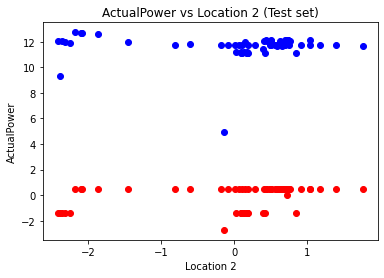

In [183]:
# Visualising the Test set results
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], y_hat2, 'bo')
plt.title('ActualPower vs Location 2 (Test set)')
plt.xlabel('Location 2')
plt.ylabel('ActualPower')
plt.show()

In [184]:
# Построение нейронной сети со следующей архитектурой (5-7-1): входной слой с 5 нейронами (кол-во объясняющих перемннных), 1 скрытый слоя
# с 7 нейронами и один выходной слой
# Initialising the ANN
rnn3=Sequential()

# Adding the input layer
rnn3.add(Input(shape=(5,)))

# Adding the  first hidden layer
rnn3.add(Dense(7, activation='tanh'))

# Adding the output layer
rnn3.add(Dense(1, activation='linear'))

# Compiling the ANN
rnn3.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [185]:
# Fitting the ANN to the Training set
rnn3.fit(X_train, y_train, batch_size = 20, epochs = 100)

Epoch 1/100
13/13 [==============================] - 0s 1ms/step - loss: 2.3617 - accuracy: 0.0000e+00
Epoch 2/100
13/13 [==============================] - 0s 997us/step - loss: 2.1288 - accuracy: 0.0000e+00
Epoch 3/100
13/13 [==============================] - 0s 1ms/step - loss: 1.9254 - accuracy: 0.0000e+00
Epoch 4/100
13/13 [==============================] - 0s 1ms/step - loss: 1.7557 - accuracy: 0.0000e+00
Epoch 5/100
13/13 [==============================] - 0s 998us/step - loss: 1.5823 - accuracy: 0.0000e+00
Epoch 6/100
13/13 [==============================] - 0s 1ms/step - loss: 1.4349 - accuracy: 0.0000e+00
Epoch 7/100
13/13 [==============================] - 0s 1ms/step - loss: 1.3012 - accuracy: 0.0000e+00
Epoch 8/100
13/13 [==============================] - 0s 1ms/step - loss: 1.1708 - accuracy: 0.0000e+00
Epoch 9/100
13/13 [==============================] - 0s 997us/step - loss: 1.0589 - accuracy: 0.0000e+00
Epoch 10/100
13/13 [==============================] - 0s 1ms/step -

13/13 [==============================] - 0s 921us/step - loss: 0.0451 - accuracy: 0.0000e+00
Epoch 80/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0445 - accuracy: 0.0000e+00
Epoch 81/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0440 - accuracy: 0.0000e+00
Epoch 82/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0435 - accuracy: 0.0000e+00
Epoch 83/100
13/13 [==============================] - 0s 997us/step - loss: 0.0429 - accuracy: 0.0000e+00
Epoch 84/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0424 - accuracy: 0.0000e+00
Epoch 85/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0419 - accuracy: 0.0000e+00
Epoch 86/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0414 - accuracy: 0.0000e+00
Epoch 87/100
13/13 [==============================] - 0s 1ms/step - loss: 0.0409 - accuracy: 0.0000e+00
Epoch 88/100
13/13 [==============================] - 0s 997us/step - los

In [186]:
# Predict the Training set results
y_modeled3=rnn3.predict(X_train)

In [187]:
# Predicting the Test set results
y_pred3 = rnn3.predict(X_test)

In [188]:
#Inversing scalling
#from sklearn.preprocessing import StandardScaler
#y_hat3 = sc.inverse_transform(y_pred3)
#y_test = sc.inverse_transform(y_test)
#X_test = sc.inverse_transform(X_test)

In [189]:
#from sklearn.metrics import mean_squared_error 
#mean_squared_error(y_test,y_hat3)

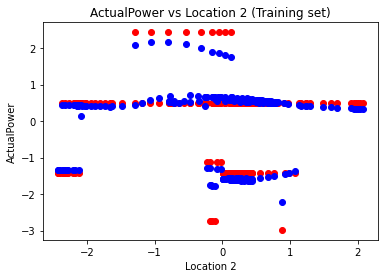

In [190]:
# Visualising the Training set results
plt.scatter(X_train[:,2], y_train, color = 'red')
plt.plot(X_train[:,2], rnn3.predict(X_train), 'bo')
plt.title('ActualPower vs Location 2 (Training set)')
plt.xlabel('Location 2')
plt.ylabel('ActualPower')
plt.show()

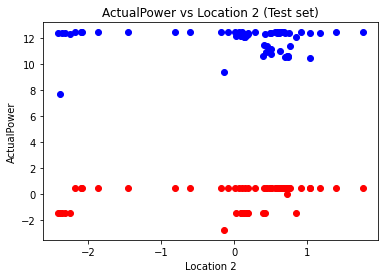

In [192]:
# Visualising the Test set results
plt.scatter(X_test[:,2], y_test, color = 'red')
plt.plot(X_test[:,2], y_hat3, 'bo')
plt.title('ActualPower vs Location 2 (Test set)')
plt.xlabel('Location 2')
plt.ylabel('ActualPower')
plt.show()

In [193]:
#Inversing scalling
from sklearn.preprocessing import StandardScaler
y_hat1 = sc.inverse_transform(y_pred1)
y_hat2 = sc.inverse_transform(y_pred2)
y_hat3 = sc.inverse_transform(y_pred3)

y_test = sc.inverse_transform(y_test)
X_test = sc.inverse_transform(X_test)

In [194]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test,y_hat1)

0.10357983781286112

In [195]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test,y_hat2)

0.11138957257198012

In [196]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_test,y_hat3)

0.20890224144386524

In [ ]:
# Наилучшей моделью является модель с архитектурой 5-5-1